### Problem Statement

##### Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 


In [2]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Basic Checks

In [3]:
# since data is in form of excel file we need to use pandas read_excel to load data

train_data = pd.read_excel("Flight_Fare.xlsx")

pd.set_option('display.max_columns',None) # “Show all the columns in the DataFrame — don’t hide any.”
pd.set_option('display.max_rows',None) # shows all rows

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True) # Removes all rows that contains any missing (NaN) values and update it directly

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.shape # To check shape of the data

(10682, 11)

In [10]:
train_data.duplicated().sum()

np.int64(220)

# Visualization

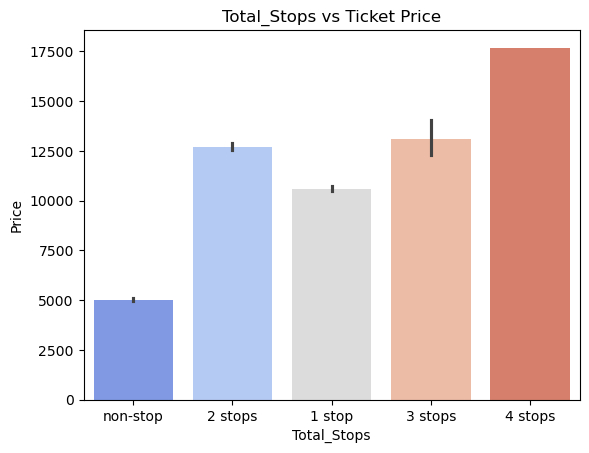

In [11]:
sns.barplot(x="Total_Stops",y="Price",data=train_data, palette="coolwarm")
plt.title("Total_Stops vs Ticket Price")
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.show()

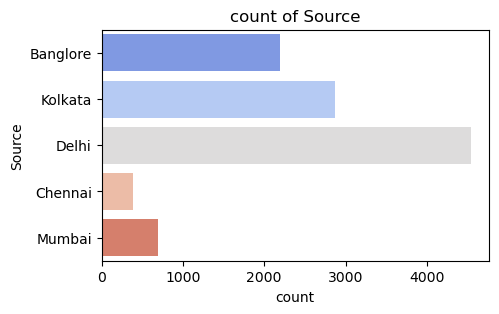

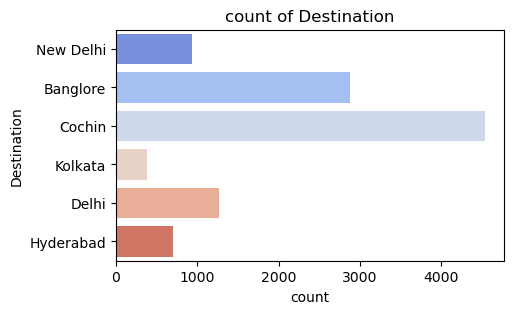

In [12]:
columns = ["Source","Destination"]

for col in columns:
    plt.figure(figsize=(5,3))
    sns.countplot(train_data[col], palette="coolwarm")
    plt.title(f"count of {col}")
    plt.show()

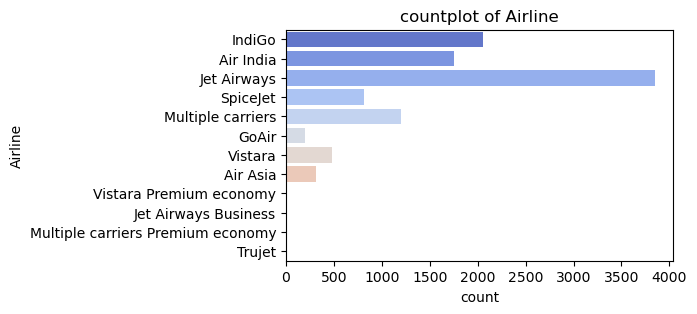

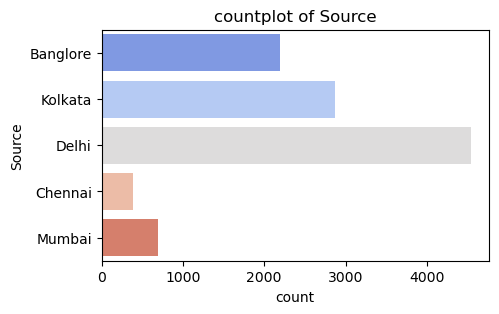

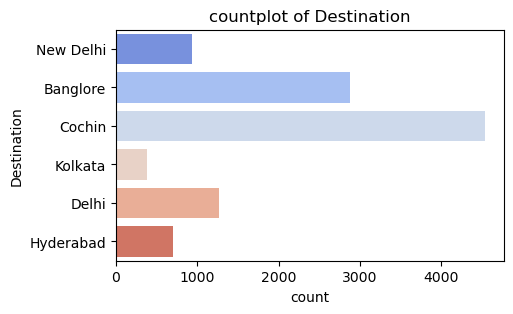

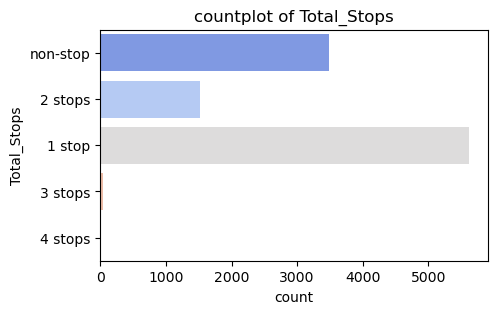

In [13]:
columns = ["Airline","Source","Destination","Total_Stops"]

for col in columns:
    plt.figure(figsize=(5,3))
    sns.countplot(train_data[col], palette="coolwarm")
    plt.title(f"countplot of {col}")
    plt.show()

#### Insight:

##### These visualizations help us understand the distribution of categorical variables. They show which airlines, source cities, destinations, and flight types are most common. This kind of analysis is essential before model building to identify any imbalance or bias in the dataset.

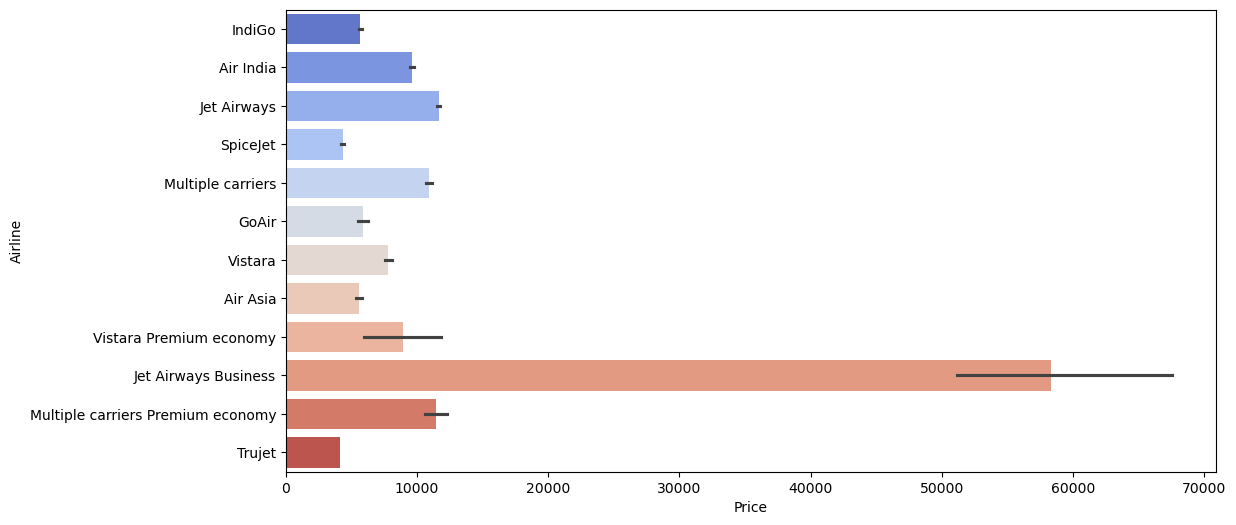

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(y="Airline",x="Price",data=train_data, palette="coolwarm")
plt.show()

# EDA

In [15]:
# We can see that date_of_journey is a object datatype, 
# Therefore convert data_of_journey datatype to timestamp for proper prediction.

# Extracting Date
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.day 
# Extracting Month
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.month
# Extracting Year
train_data['Journey_year'] = pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.year

# Since we have converted Date_of_Journey to integer, Now we can drop this column as it is no use
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
# Departure time when plane leaves the gate

# Extracting Hours
train_data['dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
# Extracting Minutes
train_data['dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
# Now we can drop the Dep_Time as it is no use
train_data.drop(['Dep_Time'], axis=1, inplace=True)
train_data.head()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [17]:
# Arrival time when plane pulls up the gate

# Extracting Hours
train_data['Arrival_Time'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
# Extracting Minutes
train_data['Arrival_Time'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
# Now we can drop the Arrival_Time as it is no use
train_data.drop(['Arrival_Time'], axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [18]:
train_data.drop_duplicates(inplace=True) # dropped duplicated values

In [19]:
train_data.duplicated().sum()

np.int64(0)

In [20]:
train_data["Duration"] = train_data["Duration"].apply(lambda x: x if "m" in x else x + "0m") # if Duration does't have minutes it add "0m" or doesn't have hours add "0h"

train_data["Duration_hours"] = train_data["Duration"].str.extract(r'(\d+)h').fillna(0).astype(int) # Extract Hours
train_data["Duration_mins"] = train_data["Duration"].str.extract(r'(\d+)m').fillna(0).astype(int)  # Extract Minutes

train_data.drop(["Duration"], axis=1, inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,4,45


In [21]:
train_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int32
Journey_month       int32
Journey_year        int32
dep_hour            int32
dep_min             int32
Duration_hours      int64
Duration_mins       int64
dtype: object

In [22]:
train_data["Route"].str.split("→").str.len().max() # checking how many places does route has

6

In [23]:
# splitting the route into different column
train_data['Route_1'] = train_data['Route'].str.split("→").str[0]
train_data['Route_2'] = train_data['Route'].str.split("→").str[1]
train_data['Route_3'] = train_data['Route'].str.split("→").str[2]
train_data['Route_4'] = train_data['Route'].str.split("→").str[3]
train_data['Route_5'] = train_data['Route'].str.split("→").str[4]
train_data['Route_6'] = train_data['Route'].str.split("→").str[5]
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,50,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,25,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,19,0,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,5,25,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,4,45,BLR,NAG,DEL,NaN,NaN,NaN


In [24]:
# repacing the NaN values with "None"
train_data["Route_1"].fillna("None", inplace=True)
train_data["Route_2"].fillna("None", inplace=True)
train_data["Route_3"].fillna("None", inplace=True)
train_data["Route_4"].fillna("None", inplace=True)
train_data["Route_5"].fillna("None", inplace=True)
train_data["Route_6"].fillna("None", inplace=True)

train_data.drop(["Route"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,2,50,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,7,25,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,19,0,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,5,25,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,4,45,BLR,NAG,DEL,None,None,None


In [25]:
## Convert the string to integer by Labelencoder

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# train_data["Airline"] = encoder.fit_transform(train_data["Airline"])
# train_data["Source"] = encoder.fit_transform(train_data["Source"])
# train_data["Destination"] = encoder.fit_transform(train_data["Destination"])
# train_data["Total_Stops"] = encoder.fit_transform(train_data["Total_Stops"])
# train_data["Additional_Info"] = encoder.fit_transform(train_data["Additional_Info"])
# train_data["Route_1"] = encoder.fit_transform(train_data["Route_1"])
# train_data["Route_2"] = encoder.fit_transform(train_data["Route_2"])
# train_data["Route_3"] = encoder.fit_transform(train_data["Route_3"])
# train_data["Route_4"] = encoder.fit_transform(train_data["Route_4"])
# train_data["Route_5"] = encoder.fit_transform(train_data["Route_5"])
# train_data["Route_6"] = encoder.fit_transform(train_data["Route_6"])

# train_data.head(8)

In [26]:
# Another method to convert string to int
from sklearn.preprocessing import LabelEncoder

encoders = {}

columns = ["Airline","Source","Destination","Total_Stops","Additional_Info","Route_1","Route_2","Route_3","Route_4","Route_5","Route_6"]

for col in columns:
    le=LabelEncoder()
    train_data[col]=le.fit_transform(train_data[col])
    encoders[col] = le

train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,3,0,5,4,8,3897,24,3,2019,22,20,2,50,0,13,29,13,5,1
1,1,3,0,1,8,7662,1,5,2019,5,50,7,25,2,25,1,3,5,1
2,4,2,1,1,8,13882,9,6,2019,9,25,19,0,3,32,4,5,5,1
3,3,3,0,0,8,6218,12,5,2019,18,5,5,25,2,34,3,13,5,1
4,3,0,5,0,8,13302,1,3,2019,16,50,4,45,0,34,8,13,5,1


In [27]:
train_data.duplicated().sum()

np.int64(0)

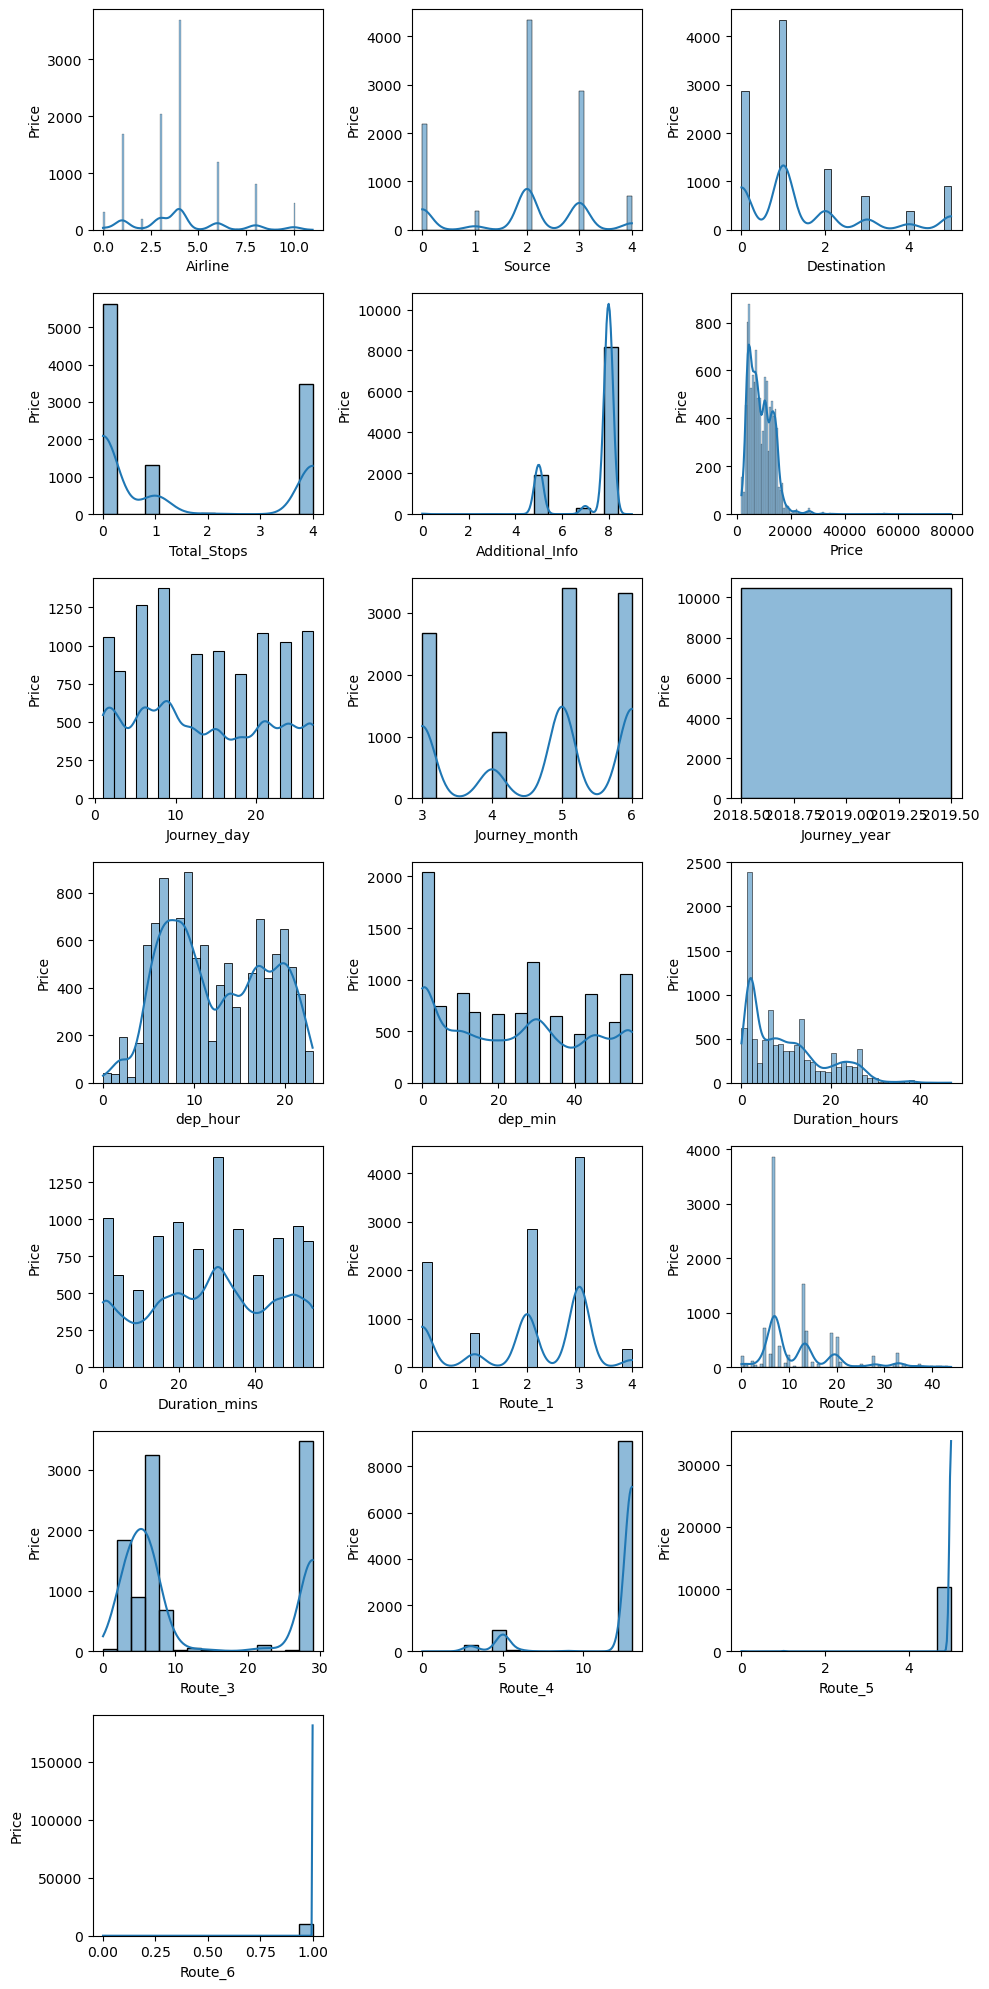

In [28]:
plt.figure(figsize=(10,20))
plotnumber = 1

for column in train_data:
    if plotnumber<=19:
        ax = plt.subplot(7,3,plotnumber)
        sns.histplot(x=train_data[column], kde=True)
        
        plt.xlabel(column, fontsize=10)
        plt.ylabel("Price", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

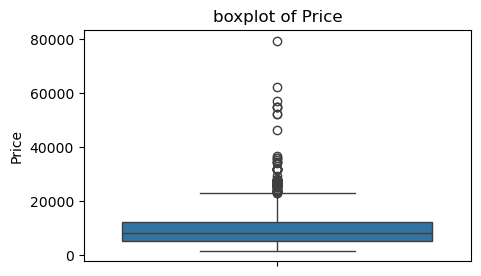

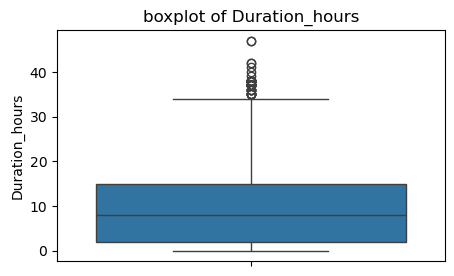

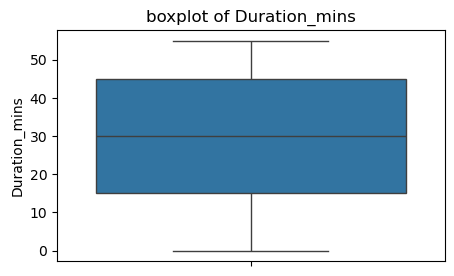

In [29]:
columns = ["Price","Duration_hours","Duration_mins"]   # Checking Outliers for these 3 columns, Other columns are not necessary

for col in columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(train_data[col])
    plt.title(f"boxplot of {col}")
    plt.show()

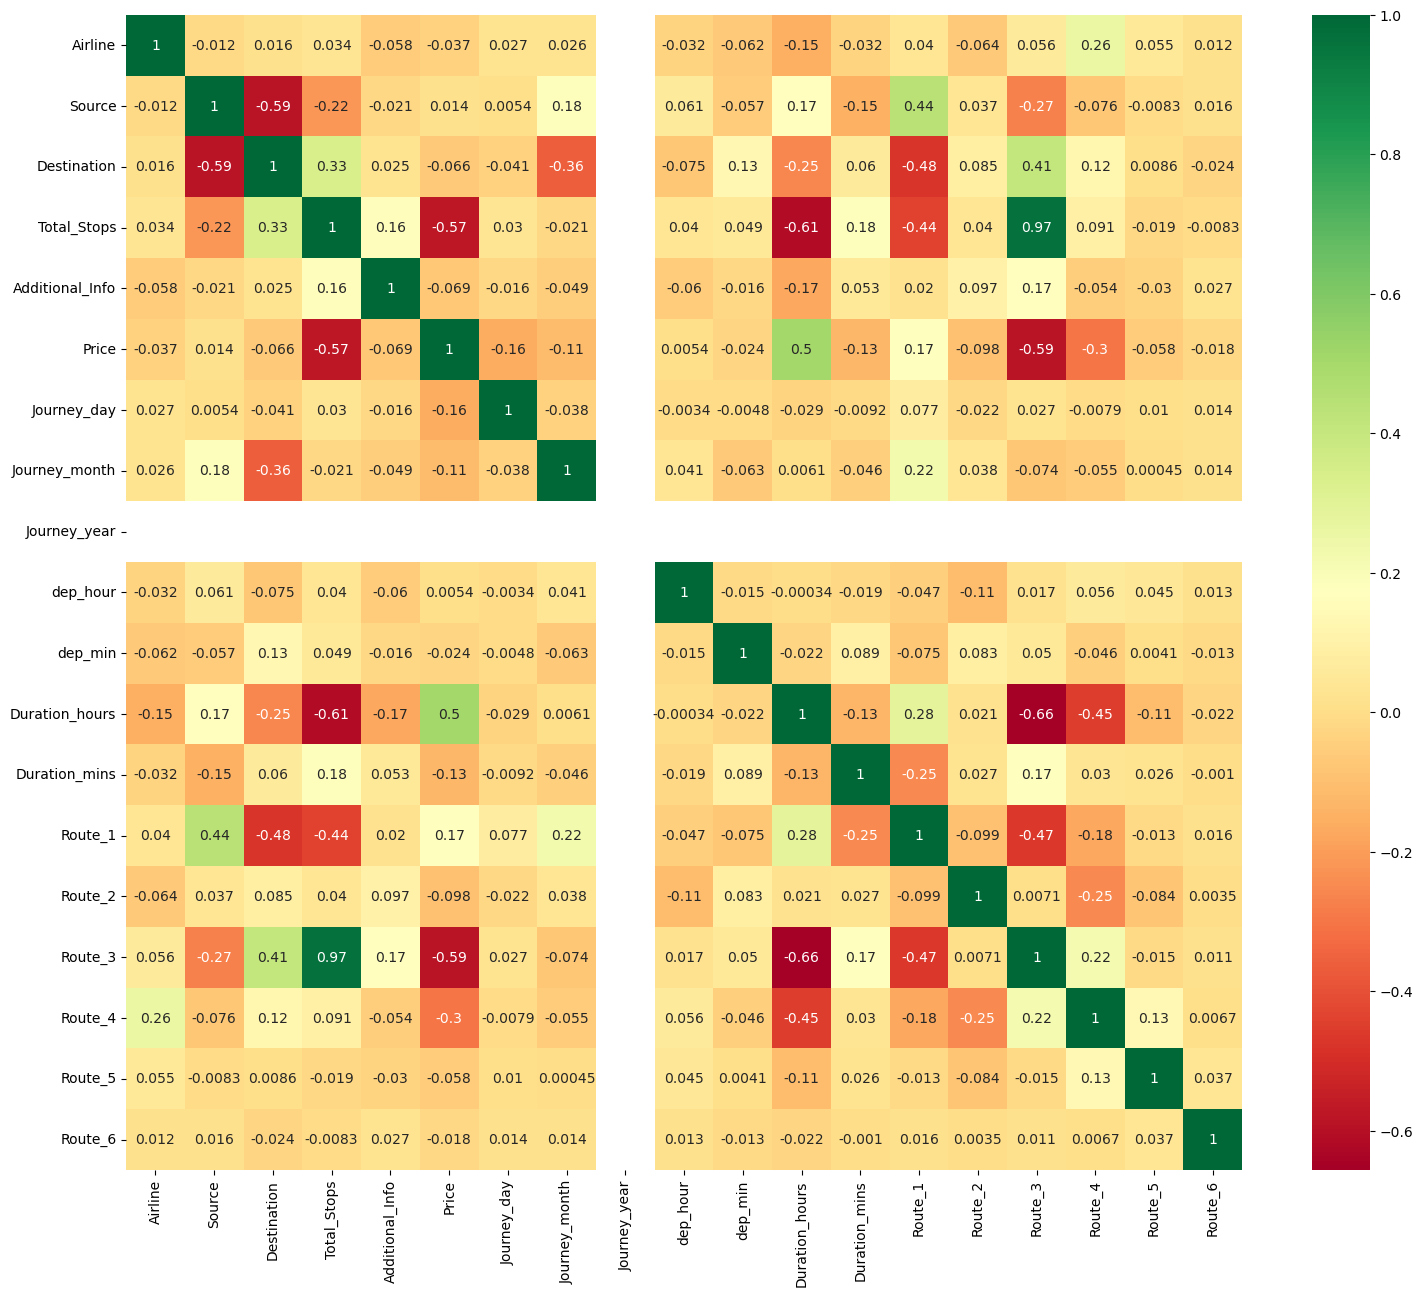

In [30]:
# Heatmap
plt.figure(figsize=(18,15))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [31]:
train_data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,dep_hour,dep_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
count,10460.00000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.0,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000
mean,3.98088,1.954015,1.438815,1.462620,7.396367,9027.360421,13.463193,4.701816,2019.0,12.476673,24.406310,10.027725,28.206023,2.005354,11.784417,13.375526,11.924570,4.983461,0.999904
std,2.36380,1.186133,1.480337,1.821208,1.212117,4625.057376,8.467058,1.163676,0.0,5.726244,18.816989,8.378088,16.877967,1.208445,7.834535,11.331336,2.814763,0.260938,0.009778
min,0.00000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,2.000000,0.000000,0.000000,8.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,2.000000,15.000000,1.000000,7.000000,4.000000,13.000000,5.000000,1.000000
50%,4.00000,2.000000,1.000000,0.000000,8.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,8.000000,30.000000,2.000000,7.000000,6.000000,13.000000,5.000000,1.000000
75%,4.00000,3.000000,2.000000,4.000000,8.000000,12346.250000,21.000000,6.000000,2019.0,18.000000,40.000000,15.000000,45.000000,3.000000,14.000000,29.000000,13.000000,5.000000,1.000000
max,11.00000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,47.000000,55.000000,4.000000,44.000000,29.000000,13.000000,5.000000,1.000000


In [32]:
train_data[train_data['Duration_hours']==0].shape[0] # Checking 0 Values 

1

In [33]:
train_data.drop(train_data[(train_data['Duration_hours']==0)].index, inplace= True) # Droping 0 values


In [34]:
train_data[train_data['Duration_hours']==0].shape[0]

0

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10459 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10459 non-null  int64
 1   Source           10459 non-null  int64
 2   Destination      10459 non-null  int64
 3   Total_Stops      10459 non-null  int64
 4   Additional_Info  10459 non-null  int64
 5   Price            10459 non-null  int64
 6   Journey_day      10459 non-null  int32
 7   Journey_month    10459 non-null  int32
 8   Journey_year     10459 non-null  int32
 9   dep_hour         10459 non-null  int32
 10  dep_min          10459 non-null  int32
 11  Duration_hours   10459 non-null  int64
 12  Duration_mins    10459 non-null  int64
 13  Route_1          10459 non-null  int64
 14  Route_2          10459 non-null  int64
 15  Route_3          10459 non-null  int64
 16  Route_4          10459 non-null  int64
 17  Route_5          10459 non-null  int64
 18  Route_6    

# Preprocessing

In [36]:
x = train_data.drop(["Price"], axis=1)
y = train_data["Price"]

In [37]:
# split data for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

In [40]:
# Evaluation Function for Multiple Model

def evaluate_all_models(x_train,x_test, y_train,y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "Support Vector Machine": SVR(),
        "XGBRegressor": XGBRegressor(),
        # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
        "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
    }
    
    results = [] # Empty list to store results
    
    #loop through each model
    for name,model in models.items():
        try:
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
    
            r2 =r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test,y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
            results.append({
                "Model" : name,
                "R2 Score": round(r2, 4),
                "MAE": round(mae, 2),
                "RMSE": round(rmse, 2)
            })

        except Exception as e:
            print(f"Error in {name}: {e}")
    
    # Convert results into DataFrame for better visualization
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
    
    print("Model Evaluation Results: ")
    return results_df

In [41]:
results_df = evaluate_all_models(x_train,x_test, y_train,y_test)
print(results_df)

Model Evaluation Results: 
                     Model  R2 Score      MAE     RMSE
0             XGBRegressor    0.9250   722.65  1242.47
1  Random Forest Regressor    0.9135   655.66  1334.50
2        Gradient Boosting    0.8564  1207.65  1719.37
3  Decision Tree Regressor    0.7937   761.64  2061.26
4    K-Neighbors Regressor    0.7837  1131.99  2110.34
5        Linear Regression    0.5109  2257.31  3173.56
6       AdaBoost Regressor    0.1911  3484.50  4081.40
7   Support Vector Machine    0.0604  3326.86  4398.68


###### You are looping over many different models (Linear Regression, Random Forest, SVR, XGBoost, etc.).
###### Each model:
###### Has different requirements (data format, scaling, etc.)

###### Might fail to train or predict due to:
###### Incompatible data shape
###### Missing or non-numeric values
###### Model-specific parameter errors
###### Library not installed (XGBRegressor, CatBoost, etc.)

###### If one model fails (e.g., SVR() throws an error), without try:,
###### the entire function would stop executing immediately.

###### With try–except:
###### The error is caught instead of crashing the program.
###### It prints a clear message (e.g., Error in SVR: ValueError: X has NaN values)
###### Then it continues with the next model in the loop.

###### So, your function will still evaluate all other models even if one fails.

## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1600, num=12)]
max_depth = [int(x) for x in np.linspace(3,10,8)]
learning_rate = [0.01, 0.03, 0.05, 0.1, 0.2]
subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree = [0.3, 0.5, 0.7, 0.8, 1.0]
min_child_weight = [1,2,3,5,7]
gamma = [0, 0.1, 0.2, 0.3]

# Create parameter grid
param_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'subsample' : subsample,
    'colsample_bytree' : colsample_bytree,
    'min_child_weight' : min_child_weight,
    'gamma' : gamma
}

# Model
xgb = XGBRegressor(random_state=42)

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring = 'neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# Fit
xgb_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=1054, subsample=0.9; total time=   6.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=1054, subsample=0.9; total time=   6.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=1054, subsample=0.9; total time=   6.4s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=1054, subsample=0.9; total time=   6.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=9, min_child_weight=3, n_estimators=1054, subsample=0.9; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=1327, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 5, 7],
                                        'n_estimators': [100, 236, 372, 509,
                                                         645, 781, 918, 1054,
                                                         1190, 1327, 1463,
                                                         1600],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
xgb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1463,
 'min_child_weight': 7,
 'max_depth': 7,
 'learning_rate': 0.03,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [44]:
prediction = xgb_random.predict(x_test)
prediction

array([14792.196 , 10434.417 ,  8586.127 , ...,  6217.9116,  7587.9155,
        4740.219 ], dtype=float32)

## XGBRegressor

In [45]:
best_params = xgb_random.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'subsample': 0.8, 'n_estimators': 1463, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [46]:
best_xgb_model = xgb_random.best_estimator_
best_xgb_model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=7, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1463,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
y_pred = best_xgb_model.predict(x_test)
y_pred

array([14792.196 , 10434.417 ,  8586.127 , ...,  6217.9116,  7587.9155,
        4740.219 ], dtype=float32)

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Tuned XGBRegressor Results:")
print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Tuned XGBRegressor Results:
R2 Score: 0.9169184565544128
MAE: 692.411376953125
RMSE: 1307.999139907974


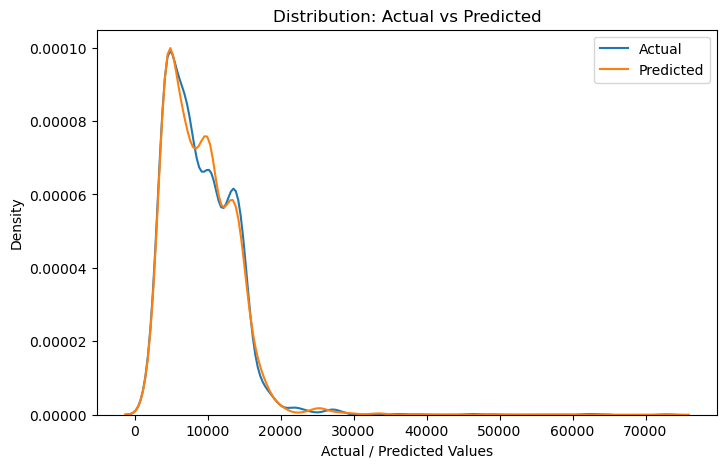

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(y_test, label='Actual', fill=False)
sns.kdeplot(y_pred, label='Predicted', fill=False)

plt.xlabel('Actual / Predicted Values')
plt.ylabel('Density')
plt.title('Distribution: Actual vs Predicted')
plt.legend()
plt.show()


<Axes: xlabel='Price', ylabel='Density'>

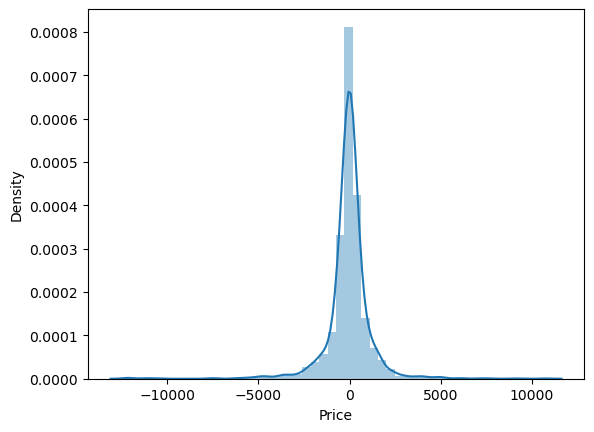

In [50]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'Predicted')

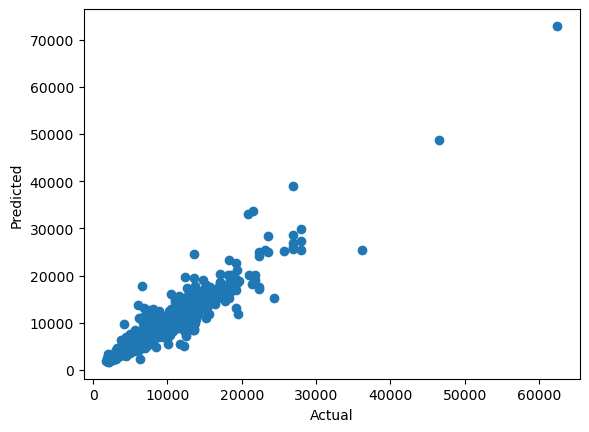

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

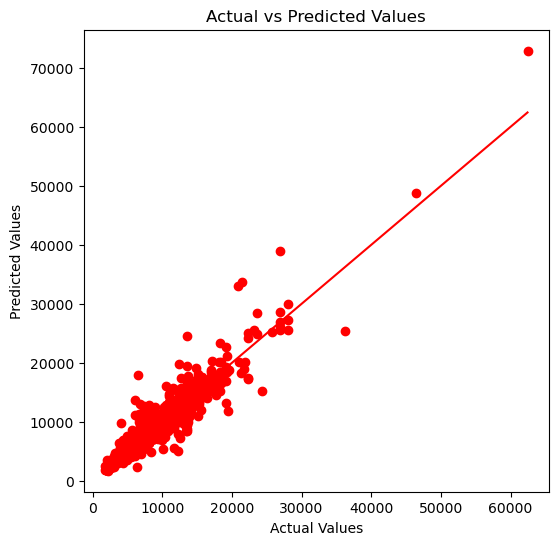

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


# Save the model to reuse it again

In [60]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [61]:
model = open('flight_rf.pkl', 'rb')
flight = pickle.load(model)

In [64]:
from sklearn import metrics

metrics.r2_score(y_test, y_pred)

0.9169184565544128